# Image analysis
Dec 18, 2019


In [133]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import glob
# import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [134]:
from scipy import fftpack,fft

In [135]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    source: https://www.astrobetter.com/blog/2010/03/03/fourier-transforms-of-images-in-python/
    """
    # Create a grid of points with x and y coordinates
    y, x = np.indices(image.shape)
    
    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    # Get the radial coordinate for every grid point. Array has the shape of image
    r = np.hypot(x - center[0], y - center[1])

    ind = np.argsort(r.flat) ### Get indices that sort the "r" array in ascending order.

    r_sorted = r.flat[ind]     ### Sort the "r" array
    
    i_sorted = image.flat[ind]   ### Sort the image points according to the radial coordinate

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [136]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

(60000, 28, 28) (60000,)


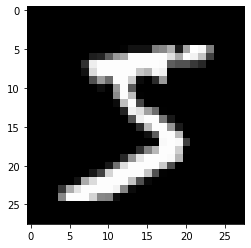

In [137]:
print(train_images.shape,train_labels.shape)

image=train_images[0]
### Plot one image
plt.figure()
plt.imshow(image, cmap='gray')

In [138]:
print(image.shape)

(28, 28)


In [38]:
F1=fftpack.fft2(image)
F2=fftpack.fftshift(F1)


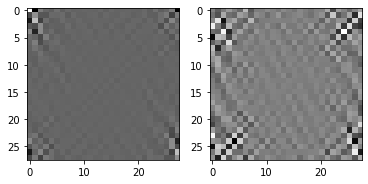

In [37]:
a,b=np.real(F1),np.imag(F1)
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(a, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(b, cmap='gray')

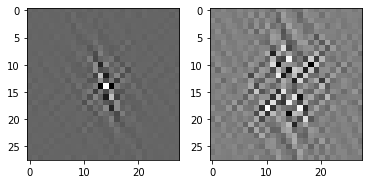

In [39]:
a,b=np.real(F2),np.imag(F2)
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(a, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(b, cmap='gray')

In [94]:
P2d=np.abs(F2)**2
P1d=azimuthalAverage(P2d)

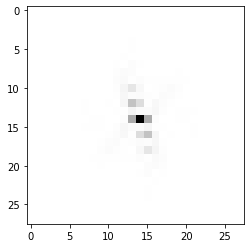

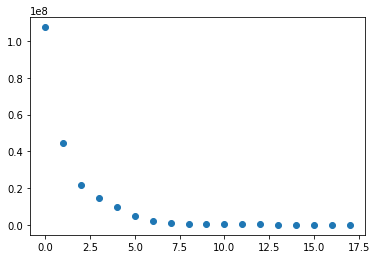

In [98]:
plt.figure()
plt.imshow(P2d, cmap=plt.cm.Greys)
plt.figure()
plt.plot(P1d,marker='o',linestyle='')


In [140]:
# Create a grid of points with x and y coordinates

y, x = np.indices((5,5))
y, x = np.indices(image.shape)


center=None
if not center:
    center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

# Get the radial coordinate for every grid point. Array has the shape of image
r = np.hypot(x - center[0], y - center[1])

ind = np.argsort(r.flat) ### Get indices that sort the "r" array in ascending order.

r_sorted = r.flat[ind]     ### Sort the "r" array

i_sorted = image.flat[ind]   ### Sort the image points according to the radial coordinate

# Get the integer part of the radii (bin size = 1)
r_int = r_sorted.astype(int)

# Find all pixels that fall within each radial bin.
### Compute differences of successive indices to get deltar. Assumes all radii represented
deltar = r_int[1:] - r_int[:-1]  
rind = np.where(deltar)[0]       ### Find locations where deltar is 0 -> locations where radius changes
nr = rind[1:] - rind[:-1]        # number of elements in each radius bin

# Cumulative sum to figure out sums for each radius bin
### created an array of cumulative sum. like cumulative prob distribution array 
csim = np.cumsum(i_sorted, dtype=float)   

tbin = csim[rind[1:]] - csim[rind[:-1]]  ### Compute difference in image sum values in different bins

radial_prof = tbin / nr   ### Divide the sum by the number of elements in a bin

print(radial_prof)

[102.          73.1         47.4         52.71428571  96.71875
 118.40909091  96.86538462  45.83333333  31.16666667  24.08823529
  18.75        14.58695652   4.05263158   2.           0.
   0.           0.           0.        ]


In [151]:
# print(r_int,deltar)
print(rind,nr)

[  3  11  31  51  79 111 155 207 255 315 383 447 539 615 683 723 751 771
 779] [ 8 20 20 28 32 44 52 48 60 68 64 92 76 68 40 28 20  8]


In [182]:
tbin.shape

(18,)

| Function | Description|  |
| -----| ----| |
| np.indices | Gives tuple of arrays with indices increasing along the axis. Eg. 0th array will have numbers increasing along rows, 1th along columns,etc. | |
| np.hypot | Computes the hypotenuse given arms. equivalent to radial distance| |
| a.flat | Flatten array | |
| np.argsort | Returns indices that would sort the array| | 
| np.cumsum | sum of elements along a given axis | |
